<a href="https://colab.research.google.com/github/ahargunyllib/indonesian-movies-statistics/blob/main/Analisis_Data_Film_Indonesia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Anggota Kelompok:
1. Nugraha Billy Viandy (235150200111011)
2. Muhammad Danish Alfattah Lubis (235150207111008)
3. Muhammad Bagas Anugrah (235150201111008)

Datasets:
[Kaggle](https://www.kaggle.com/datasets/dionisiusdh/imdb-indonesian-movies)\
This IMDb Indonesian Movies Dataset contains information of 1262 Indonesian movies. The data was gathered using IMDb-Scraper and then was converted and cleaned into a .csv file.

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/ahargunyllib/indonesian-movies-statistics/main/indonesian_movies.csv")
# Tampilkan hanya film dengan rentang 2010-2020
filtered_df = df[(df['year'] >= 2010) & (df['year'] <= 2020)]
filtered_df.head(10)

,title,year,description,genre,rating,users_rating,votes,languages,directors,actors,runtime
0,#FriendButMarried 2,2020,Ayudia (Mawar De Jongh) is not satisfied enoug...,Biography,13+,6.5,120,Indonesian,Rako Prijanto,"['Adipati Dolken', 'Mawar Eva de Jongh', 'Vonn...",100 min
1,4 Mantan,2020,"Sara, Airin, Rachel, and Amara were accidental...",Thriller,17+,6.4,8,Indonesian,Hanny Saputra,"['Ranty Maria', 'Jeff Smith', 'Melanie Berentz...",80 min
2,Aku Tahu Kapan Kamu Mati,2020,"After apparent death, Siena is able to see sig...",Horror,13+,5.4,17,Indonesian,Hadrah Daeng Ratu,"['Natasha Wilona', 'Ria Ricis', 'Al Ghazali', ...",92 min
3,Anak Garuda,2020,"Good Morning Indonesia, a school for poor orph...",Adventure,13+,9.1,27,Indonesian,Faozan Rizal,"['Tissa Biani Azzahra', 'Violla Georgie', 'Aji...",129 min
4,Dignitate,2020,Alfi (Al Ghazali) meets Alana (Caitlin Halderm...,Drama,17+,7.6,33,Indonesian,Fajar Nugros,"['Al Ghazali', 'Caitlin Halderman', 'Giorgino ...",109 min
5,Guru-Guru Gokil,2020,"When staff salaries get stolen at his school, ...",Comedy,NaN,6.1,153,Indonesian,Sammaria Simanjuntak,"['Gading Marten', 'Boris Bokir', 'Kevin Ardilo...",101 min
6,Hunter in the Blue Side of Manchester,2020,This movie tells the story of Hanif Thamrin (A...,Biography,13+,6.2,21,English,Rako Prijanto,"['Adipati Dolken', 'Ganindra Bimo', 'Vonny Cor...",90 min
7,Janin,2020,Randu (Reuben Elishama Hadju) and Dinar (Jill ...,Horror,17+,6.1,7,Indonesian,Ook Budiyono,"['Jill Gladys', 'Reuben Elishama', 'Meriam Bel...",85 min
8,Mangkujiwo,2020,A born of Kuntilanak from a Twin Mirror with h...,Horror,17+,5.9,67,Indonesian,Azhar Kinoi Lubis,"['Sujiwo Tejo', 'Yasamin Jasem', 'Asmara Abiga...",109 min
9,Mariposa,2020,Iqbal (Angga Yunanda) is like a Mariposa butte...,Drama,13+,8.5,54,Indonesian,Fajar Bustomi,"['Angga Yunanda', 'Adhisty Zara', 'Dannia Sals...",117 min


## Peluang Distribusi Kontinu

Rata-rata users_rating: 6.2960757780784835
Simpangan baku users_rating: 1.3760724419606747


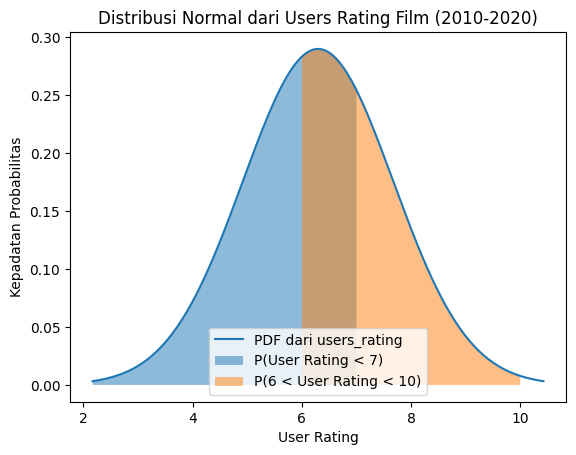

Probabilitas bahwa user rating film kurang dari 7: 0.6955
Probabilitas bahwa user rating film antara 6 dan 10: 0.5816


In [2]:
import pandas as pd
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# Muat dataset
df = pd.read_csv("https://raw.githubusercontent.com/ahargunyllib/indonesian-movies-statistics/main/indonesian_movies.csv")

# Filter DataFrame untuk film antara tahun 2010 dan 2020 (inklusif)
filtered_df = df[(df['year'] >= 2010) & (df['year'] <= 2020)]

# Ambil kolom 'users_rating'
users_ratings = filtered_df['users_rating'].dropna()

# Hitung rata-rata dan standar deviasi dari users_rating
mean_users_rating = users_ratings.mean()
std_users_rating = users_ratings.std()

print(f'Rata-rata users_rating: {mean_users_rating}')
print(f'Simpangan baku users_rating: {std_users_rating}')

# Definisikan distribusi normal dengan rata-rata dan standar deviasi yang telah dihitung
dist = norm(loc=mean_users_rating, scale=std_users_rating)

# Plot fungsi kepadatan probabilitas (PDF)
x = np.linspace(mean_users_rating - 3*std_users_rating, mean_users_rating + 3*std_users_rating, 1000)
y = dist.pdf(x)

plt.plot(x, y, label='PDF dari users_rating')
plt.xlabel('User Rating')
plt.ylabel('Kepadatan Probabilitas')
plt.title('Distribusi Normal dari Users Rating Film (2010-2020)')

# Visualisasi probabilitas bahwa user rating film kurang dari 7
x_fill = np.linspace(x.min(), 7, 1000)
y_fill = dist.pdf(x_fill)
plt.fill_between(x_fill, y_fill, alpha=0.5, label='P(User Rating < 7)')

# Visualisasi probabilitas bahwa user rating film antara 6 dan 10
x_fill_between = np.linspace(6, 10, 1000)
y_fill_between = dist.pdf(x_fill_between)
plt.fill_between(x_fill_between, y_fill_between, alpha=0.5, label='P(6 < User Rating < 10)')

plt.legend()
plt.show()

# Hitung probabilitas bahwa user rating kurang dari 7 dan antara 6 dan 10
prob_kurang_dari_7 = dist.cdf(7)
prob_antara_6_dan_10 = dist.cdf(10) - dist.cdf(6)

print(f"Probabilitas bahwa user rating film kurang dari 7: {prob_kurang_dari_7:.4f}")
print(f"Probabilitas bahwa user rating film antara 6 dan 10: {prob_antara_6_dan_10:.4f}")




## Penaksiran Parameter

Studi Kasus: Pendugaan Parameter Rata-rata User Rating Film (2010-2020)
---------------------------------------------------------------------
Jumlah Sampel (n): 739
Rata-rata Sampel (User Rating): 6.30
Standar Deviasi Sampel: 1.38
Tingkat Keyakinan: 95.0%
Nilai t Kritis: 1.963
Margin of Error: ±0.10
Interval Kepercayaan: (6.20, 6.40)


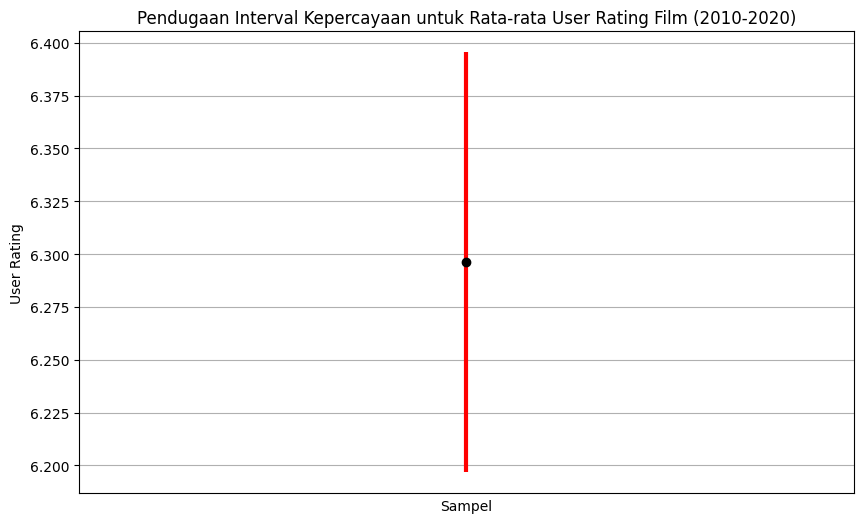

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Muat dataset
df = pd.read_csv("https://raw.githubusercontent.com/ahargunyllib/indonesian-movies-statistics/main/indonesian_movies.csv")

# Filter DataFrame untuk film antara tahun 2010 dan 2020 (inklusif)
filtered_df = df[(df['year'] >= 2010) & (df['year'] <= 2020)]

# Ambil kolom 'users_rating'
users_ratings = filtered_df['users_rating'].dropna()

# Hitung statistik sampel
n = len(users_ratings)
mean_users_rating = users_ratings.mean()
std_users_rating = users_ratings.std()

# Tentukan tingkat keyakinan
confidence_level = 0.95
alpha = 1 - confidence_level

# Hitung nilai t kritis untuk distribusi t dengan df = n-1
t_critical = stats.t.ppf(1 - alpha/2, df=n-1)

# Hitung margin of error
margin_of_error = t_critical * (std_users_rating / np.sqrt(n))

# Hitung interval kepercayaan
confidence_interval = (mean_users_rating - margin_of_error, mean_users_rating + margin_of_error)

# Cetak hasil
print("Studi Kasus: Pendugaan Parameter Rata-rata User Rating Film (2010-2020)")
print("---------------------------------------------------------------------")
print(f"Jumlah Sampel (n): {n}")
print(f"Rata-rata Sampel (User Rating): {mean_users_rating:.2f}")
print(f"Standar Deviasi Sampel: {std_users_rating:.2f}")
print(f"Tingkat Keyakinan: {confidence_level*100}%")
print(f"Nilai t Kritis: {t_critical:.3f}")
print(f"Margin of Error: ±{margin_of_error:.2f}")
print(f"Interval Kepercayaan: ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f})")

# Visualisasi interval kepercayaan
plt.figure(figsize=(10, 6))
plt.errorbar(x=1, y=mean_users_rating, yerr=margin_of_error, fmt='o', color='black', ecolor='red', elinewidth=3, capsize=0)
plt.title('Pendugaan Interval Kepercayaan untuk Rata-rata User Rating Film (2010-2020)')
plt.xlabel('Sampel')
plt.ylabel('User Rating')
plt.xticks([])
plt.grid(True)
plt.show()


## Uji Hipotesis

### UJI T 1 SAMPEL

Hipotesis Nol (H0): Rata-rata user rating film = 7

Hipotesis Alternatif (H1): Rata-rata user rating film ≠ 7

Studi Kasus: Uji Hipotesis Rata-rata Users Rating Film antara Tahun 2010 dan 2020 dengan Uji t Satu Sampel
---------------------------------------------------------------------------------------------------------
Jumlah Sampel (n): 739
Rata-rata Sampel (Users Rating): 6.30
Hipotesis Nol (H0): Rata-rata users rating = 7
Hipotesis Alternatif (H1): Rata-rata users rating ≠ 7
t-score: -13.91
P-value: 0.0000
Kesimpulan: Kita menolak hipotesis nol.


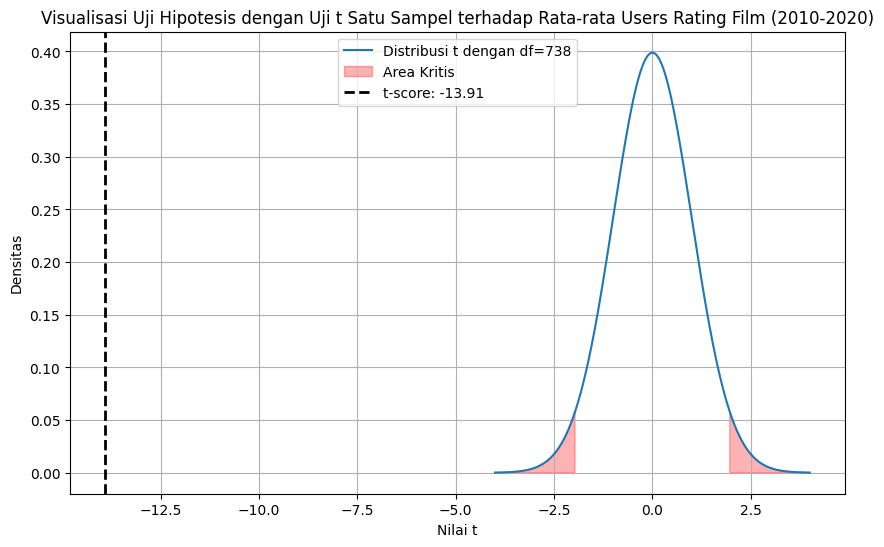

In [4]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Muat dataset
df = pd.read_csv("https://raw.githubusercontent.com/ahargunyllib/indonesian-movies-statistics/main/indonesian_movies.csv")

# Filter DataFrame untuk film antara tahun 2010 dan 2020 (inklusif)
filtered_df = df[(df['year'] >= 2010) & (df['year'] <= 2020)]

# Ambil kolom 'users_rating'
users_ratings = filtered_df['users_rating'].dropna()

# Hitung jumlah sampel dan rata-rata
n = len(users_ratings)
sample_mean = users_ratings.mean()

# Nilai yang diuji (hipotesis nol)
pop_mean = 7  # misalnya kita ingin menguji apakah rata-rata user rating berbeda dari 7

# Hitung t-score dan p-value
t_stat, p_value = stats.ttest_1samp(users_ratings, pop_mean)

# Cetak hasil
alpha = 0.05

print("Studi Kasus: Uji Hipotesis Rata-rata Users Rating Film antara Tahun 2010 dan 2020 dengan Uji t Satu Sampel")
print("---------------------------------------------------------------------------------------------------------")
print(f"Jumlah Sampel (n): {n}")
print(f"Rata-rata Sampel (Users Rating): {sample_mean:.2f}")
print(f"Hipotesis Nol (H0): Rata-rata users rating = {pop_mean}")
print(f"Hipotesis Alternatif (H1): Rata-rata users rating ≠ {pop_mean}")
print(f"t-score: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Kesimpulan: Kita menolak hipotesis nol.")
else:
    print("Kesimpulan: Kita gagal menolak hipotesis nol.")

# Visualisasi distribusi t
plt.figure(figsize=(10, 6))

# Distribusi t
degrees_freedom = n - 1
x = np.linspace(-4, 4, 1000)
plt.plot(x, stats.t.pdf(x, degrees_freedom), label=f'Distribusi t dengan df={degrees_freedom}')

# Area kritis (two-tailed test)
lower_critical = stats.t.ppf(alpha / 2, degrees_freedom)
upper_critical = stats.t.ppf(1 - alpha / 2, degrees_freedom)
plt.fill_between(x, 0, stats.t.pdf(x, degrees_freedom), where=(x <= lower_critical) | (x >= upper_critical), color='red', alpha=0.3, label='Area Kritis')

# t-score
plt.axvline(t_stat, color='black', linestyle='--', linewidth=2, label=f't-score: {t_stat:.2f}')

plt.title('Visualisasi Uji Hipotesis dengan Uji t Satu Sampel terhadap Rata-rata Users Rating Film (2010-2020)')
plt.xlabel('Nilai t')
plt.ylabel('Densitas')
plt.legend()
plt.grid(True)
plt.show()

### UJI T 2 SAMPEL
Hipotesis Nol (H0): Rata-rata users rating untuk tahun 2010-2015 = Rata-rata users rating untuk tahun 2016-2020

Hipotesis Alternatif (H1): Rata-rata users rating untuk tahun 2010-2015 != Rata-rata users rating untuk tahun 2016-2020

Studi Kasus: Uji Hipotesis Rata-rata Users Rating Film Tahun 2010-2015 vs 2016-2020 dengan Uji t Dua Sampel
----------------------------------------------------------------------------------------------------------
Jumlah Sampel Tahun 2010-2015 (n_2010_2015): 378
Jumlah Sampel Tahun 2016-2020 (n_2016_2020): 361
Rata-rata Sampel Tahun 2010-2015 (Users Rating): 6.07
Rata-rata Sampel Tahun 2016-2020 (Users Rating): 6.54
Hipotesis Nol (H0): Rata-rata users rating 2010-2015 = Rata-rata users rating 2016-2020
Hipotesis Alternatif (H1): Rata-rata users rating 2010-2015 ≠ Rata-rata users rating 2016-2020
t-score: -4.71
P-value: 0.0000
Kesimpulan: Kita menolak hipotesis nol.


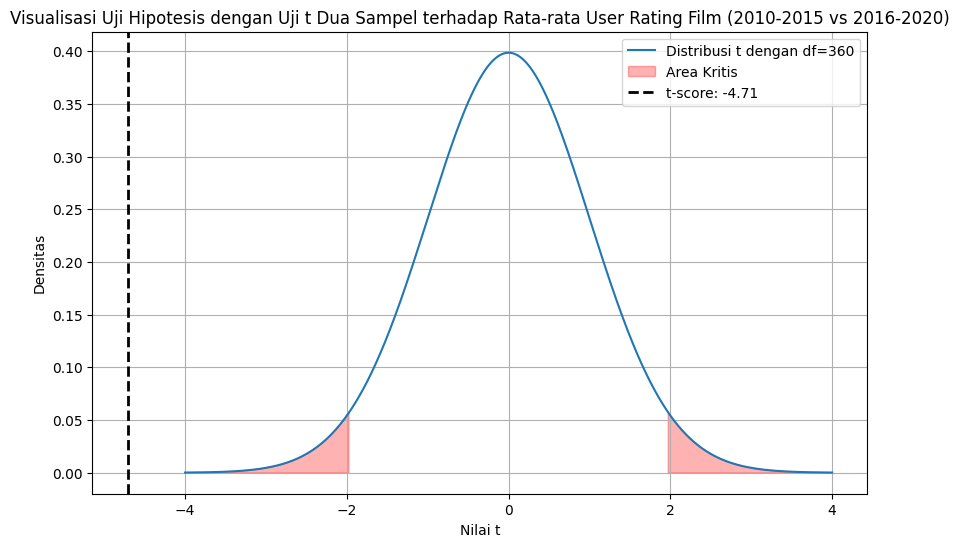

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Muat dataset
df = pd.read_csv("https://raw.githubusercontent.com/ahargunyllib/indonesian-movies-statistics/main/indonesian_movies.csv")

# Filter DataFrame untuk tahun 2010-2015 dan 2016-2020
df_2010_2015 = df[(df['year'] >= 2010) & (df['year'] <= 2015)]
df_2016_2020 = df[(df['year'] >= 2016) & (df['year'] <= 2020)]

# Hapus baris dengan data yang hilang pada kolom 'users_rating'
df_2010_2015 = df_2010_2015.dropna(subset=['users_rating'])
df_2016_2020 = df_2016_2020.dropna(subset=['users_rating'])

# Ambil kolom 'users_rating'
ratings_2010_2015 = df_2010_2015['users_rating']
ratings_2016_2020 = df_2016_2020['users_rating']

# Hitung statistik deskriptif
mean_2010_2015 = ratings_2010_2015.mean()
mean_2016_2020 = ratings_2016_2020.mean()
std_2010_2015 = ratings_2010_2015.std()
std_2016_2020 = ratings_2016_2020.std()
n_2010_2015 = len(ratings_2010_2015)
n_2016_2020 = len(ratings_2016_2020)

# Hitung t-score dan p-value untuk uji t dua sampel
t_stat, p_value = stats.ttest_ind(ratings_2010_2015, ratings_2016_2020, equal_var=False)

# Cetak hasil
alpha = 0.05

print("Studi Kasus: Uji Hipotesis Rata-rata Users Rating Film Tahun 2010-2015 vs 2016-2020 dengan Uji t Dua Sampel")
print("----------------------------------------------------------------------------------------------------------")
print(f"Jumlah Sampel Tahun 2010-2015 (n_2010_2015): {n_2010_2015}")
print(f"Jumlah Sampel Tahun 2016-2020 (n_2016_2020): {n_2016_2020}")
print(f"Rata-rata Sampel Tahun 2010-2015 (Users Rating): {mean_2010_2015:.2f}")
print(f"Rata-rata Sampel Tahun 2016-2020 (Users Rating): {mean_2016_2020:.2f}")
print(f"Hipotesis Nol (H0): Rata-rata users rating 2010-2015 = Rata-rata users rating 2016-2020")
print(f"Hipotesis Alternatif (H1): Rata-rata users rating 2010-2015 ≠ Rata-rata users rating 2016-2020")
print(f"t-score: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Kesimpulan: Kita menolak hipotesis nol.")
else:
    print("Kesimpulan: Kita gagal menolak hipotesis nol.")

# Visualisasi distribusi t
plt.figure(figsize=(10, 6))

# Distribusi t
degrees_freedom = min(n_2010_2015, n_2016_2020) - 1
x = np.linspace(-4, 4, 1000)
plt.plot(x, stats.t.pdf(x, degrees_freedom), label=f'Distribusi t dengan df={degrees_freedom}')

# Area kritis (two-tailed test)
lower_critical = stats.t.ppf(alpha / 2, degrees_freedom)
upper_critical = stats.t.ppf(1 - alpha / 2, degrees_freedom)
plt.fill_between(x, 0, stats.t.pdf(x, degrees_freedom), where=(x <= lower_critical) | (x >= upper_critical), color='red', alpha=0.3, label='Area Kritis')

# t-score
plt.axvline(t_stat, color='black', linestyle='--', linewidth=2, label=f't-score: {t_stat:.2f}')

plt.title('Visualisasi Uji Hipotesis dengan Uji t Dua Sampel terhadap Rata-rata User Rating Film (2010-2015 vs 2016-2020)')
plt.xlabel('Nilai t')
plt.ylabel('Densitas')
plt.legend()
plt.grid(True)
plt.show()

### UJI CHI - SQUARE

Hipotesis Nol (H0): Distribusi film di berbagai genre adalah independen terhadap durasi.

Hipotesis Alternatif (H1): Distribusi film di berbagai genre tidak independen terhadap durasi.

Studi Kasus: Uji Chi-Square Hubungan Genre Film dan Durasi
-----------------------------------------------------------
Tabel Kontingensi:
runtime_category  < 90 menit  90 - 120 menit  > 120 menit
genre                                                    
Action                    28              49           10
Adventure                  5              23            3
Animation                  0               3            0
Biography                  3               8            7
Comedy                    88             109            7
Crime                      2               5            1
Drama                     92             197           27
Family                     2               0            0
Fantasy                    3               1            0
History                    0               1            0
Horror                   111              58            0
Romance                    0               4            0
Thriller                   6               1      

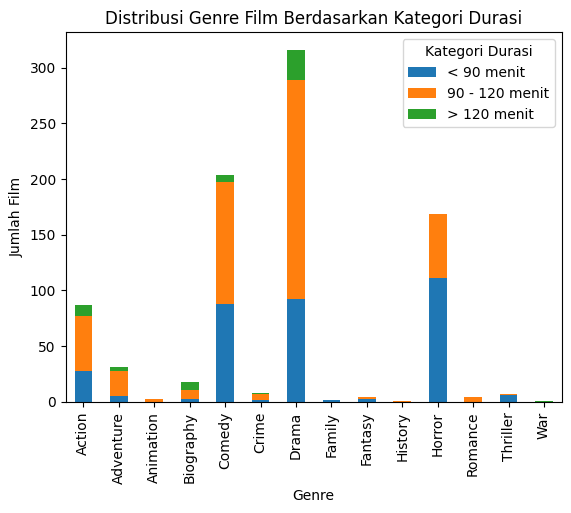

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Muat dataset
df = pd.read_csv("https://raw.githubusercontent.com/ahargunyllib/indonesian-movies-statistics/main/indonesian_movies.csv")

# Hapus baris dengan data yang hilang pada kolom 'runtime' dan 'genre'
df = df.dropna(subset=['runtime', 'genre'])

# Ekstrak angka dari kolom 'runtime' yang berformat 'int min'
df['runtime'] = df['runtime'].str.extract('(\d+)').astype(float)

# Konversi 'runtime' ke numerik
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')

# Hapus baris di mana 'runtime' tidak bisa dikonversi ke numerik
df = df.dropna(subset=['runtime'])

# Membuat kategori durasi (misalnya: pendek, sedang, panjang)
bins = [0, 90, 120, np.inf]
labels = ['< 90 menit', '90 - 120 menit', '> 120 menit']
df['runtime_category'] = pd.cut(df['runtime'], bins=bins, labels=labels)

# Membuat tabel kontingensi untuk genre dan kategori durasi
contingency_table = pd.crosstab(df['genre'], df['runtime_category'])

# Uji Chi-Square
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Cetak hasil
alpha = 0.05

print("Studi Kasus: Uji Chi-Square Hubungan Genre Film dan Durasi")
print("-----------------------------------------------------------")
print(f"Tabel Kontingensi:\n{contingency_table}\n")
print(f"Nilai Chi-Square: {chi2:.2f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")

print(f"Hipotesis Nol (H0): Distribusi film di berbagai genre adalah independen terhadap durasi.")
print(f"Hipotesis Alternatif (H1): Distribusi film di berbagai genre tidak independen terhadap durasi.")

if p < alpha:
    print("Kesimpulan: Kita menolak hipotesis nol.")
else:
    print("Kesimpulan: Kita gagal menolak hipotesis nol.")

# Visualisasi tabel kontingensi
contingency_table.plot(kind='bar', stacked=True)
plt.title('Distribusi Genre Film Berdasarkan Kategori Durasi')
plt.xlabel('Genre')
plt.ylabel('Jumlah Film')
plt.legend(title='Kategori Durasi')
plt.show()